# Ayudantía 12: Regresión Logística / kNN


Contenido : link => [notion](https://www.notion.so/Regresi-n-Log-stica-29ce4744c634809791cfcda6f06a143c?source=copy_link)

<br>


**Objetivos:**
- Comprender la lógica detrás de la función sigmoide y la frontera de decisión.
- Implementar un modelo de regresión logística en Python.
- Evaluar su desempeño mediante métricas como *accuracy*, *precision*, *recall* y *F1-score*.
- Interpretar resultados en un dataset real.

## Parte A — Dataset sintético (visualización y fundamentos)

Comenzaremos con un conjunto de datos **artificial**, generado con `make_classification`. Esto nos permitirá visualizar la separación entre clases y entender la frontera de decisión de manera intuitiva.

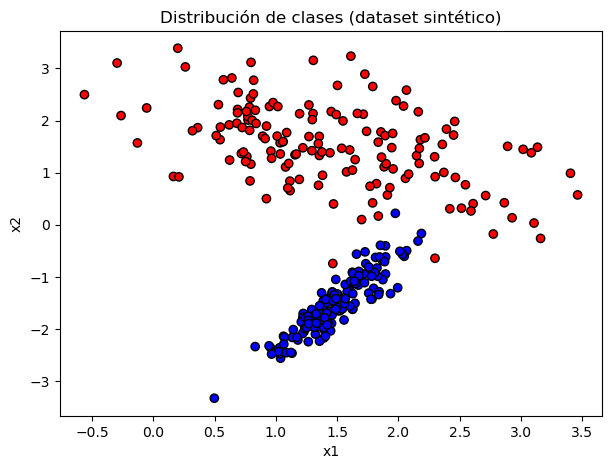

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Generar dataset sintético
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualizar los datos
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
plt.title('Distribución de clases (dataset sintético)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Entrenamiento del modelo

In [2]:
# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar desempeño
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}\nPrecision: {prec:.3f}\nRecall: {rec:.3f}\nF1-score: {f1:.3f}")

Accuracy: 0.989
Precision: 0.978
Recall: 1.000
F1-score: 0.989


### Visualización de la frontera de decisión

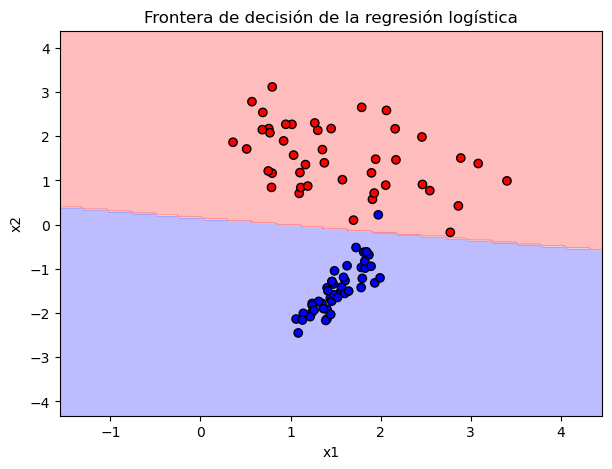

In [3]:
# Crear una malla de puntos para visualizar la frontera
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr', edgecolor='k')
plt.title('Frontera de decisión de la regresión logística')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Parte B — Dataset real: Cáncer de mama

Ahora aplicaremos la regresión logística a un dataset real: **Breast Cancer Wisconsin**, incluido en `sklearn`. El objetivo es predecir si un tumor es *maligno* o *benigno*.

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print('Características:', X.shape)
print('Clases:', data.target_names)
X.head()

Características: (569, 30)
Clases: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Entrenamiento y evaluación del modelo

Accuracy: 0.959
Precision: 0.990
Recall: 0.944
F1-score: 0.967


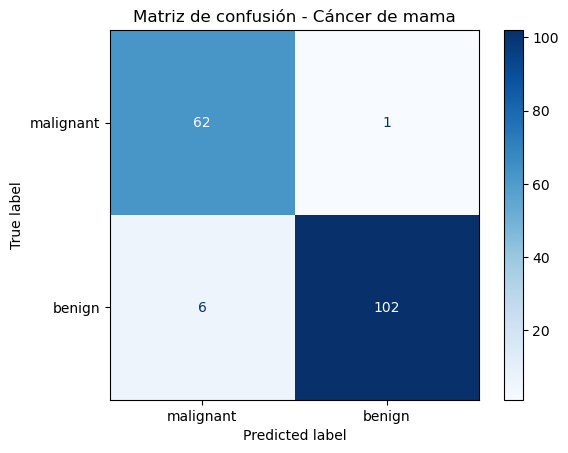

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}\nPrecision: {prec:.3f}\nRecall: {rec:.3f}\nF1-score: {f1:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap='Blues')
plt.title('Matriz de confusión - Cáncer de mama')
plt.show()

### Interpretación de coeficientes
Los coeficientes del modelo nos indican cómo influye cada variable en la probabilidad de que el tumor sea maligno.
Valores positivos incrementan la probabilidad de la clase 1 (maligno), y negativos la reducen.

In [6]:
coef = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model2.coef_[0]
}).sort_values('Coeficiente', ascending=False)

coef.head(10)

,Variable,Coeficiente
11,texture error,1.013903
0,mean radius,0.712741
20,worst radius,0.354833
1,mean texture,0.169635
15,compactness error,0.069650
3,mean area,0.025424
19,fractal dimension error,0.015932
23,worst area,-0.011412
14,smoothness error,-0.012526
16,concavity error,-0.018074


## Conclusiones
- La regresión logística transforma una combinación lineal de variables en una probabilidad entre 0 y 1 usando la **función sigmoide**.
- Es una herramienta básica pero potente para problemas de clasificación.
- Las métricas *precision*, *recall* y *F1-score* permiten evaluar su desempeño más allá de la simple exactitud.
- En el dataset de cáncer de mama, el modelo logra un rendimiento muy alto, demostrando la utilidad práctica del método.

## kNN (k-Nearest Neighbors)

kNN es un algoritmo de clasificación basado en la proximidad de los datos en el espacio de características. A continuación, se presentan los pasos para implementar kNN en Python utilizando `sklearn`.

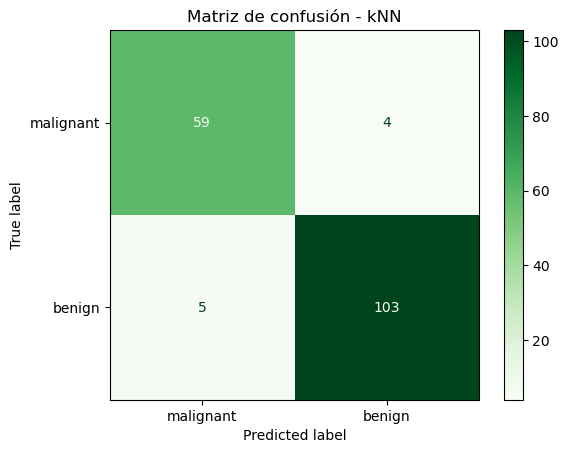

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


knn_cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(knn_cm, display_labels=data.target_names).plot(cmap='Greens')
plt.title('Matriz de confusión - kNN')
plt.show()


In [8]:
metricas= classification_report(y_test, y_pred, target_names=data.target_names) 
print(metricas)

              precision    recall  f1-score   support

   malignant       0.92      0.94      0.93        63
      benign       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171




## Visualización de fronteras de decisión en KNN

Hasta ahora hemos usado el modelo KNN para clasificar los datos del cáncer de mama. 
Sin embargo, dado que ese dataset tiene muchas características, no podemos visualizar directamente 
la frontera de decisión en más de dos dimensiones. 

Para ello, seleccionaremos **solo dos características** (por ejemplo, `mean radius` y `mean texture`) 
y entrenaremos un nuevo modelo KNN con esos datos. Luego mostraremos la frontera de decisión 
en el plano bidimensional, para observar cómo el modelo separa las clases.


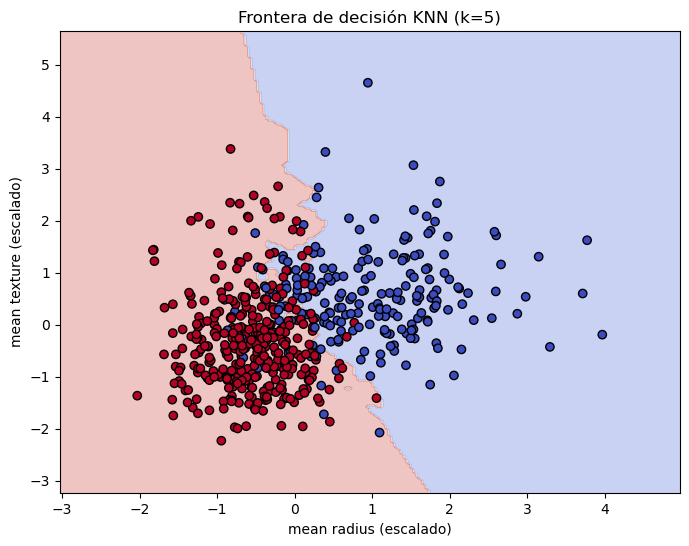

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data[:, :2]  # mean radius y mean texture
y = data.target

# importante : escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# entrenamos modelo
knn = KNeighborsClassifier(n_neighbors=5) # seteamos k=5
knn.fit(X_scaled, y)

# grilla para graficar
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# visualizar 
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('mean radius (escalado)')
plt.ylabel('mean texture (escalado)')
plt.title('Frontera de decisión KNN (k=5)')
plt.show()



## Ejemplo adicional: dataset sintético

En este segundo ejemplo, generaremos un conjunto de datos artificial con dos clases claramente separables.
Esto nos permitirá ver cómo cambia la frontera de decisión del modelo cuando modificamos el valor de \( k \).


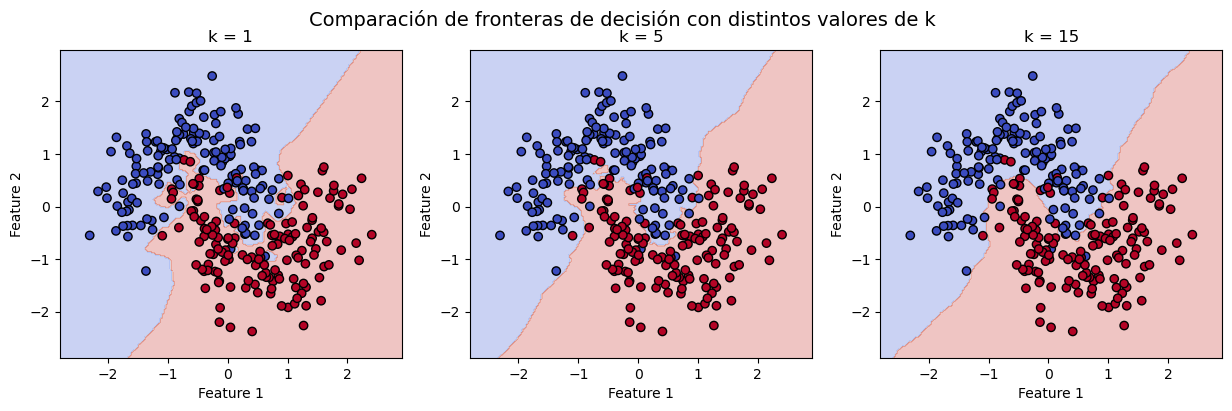

In [ ]:

from sklearn.datasets import make_moons

#datos 
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)


X_scaled = StandardScaler().fit_transform(X)

# para distintos K 
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, k in zip(axes, [1, 5, 15]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    
    # malla
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.suptitle('Comparación de fronteras de decisión con distintos valores de k', fontsize=14)
plt.show()
